<img src="mesh_basic_with_markers.svg" width="50%"/>

For a basic mesh lattice with 50/50 coupler and without any phase modulation, gain/loss, or nonlinearity, the single step propagation (m+1) can be written as
$$\begin{aligned}
a_{n+1}^{m+1} &= \frac{1}{\sqrt 2}(a_n^m + ib_n^m) \\
b_{n+1}^{m+1} &= \frac{1}{\sqrt 2}(ia_{n+2}^m + b_{n+2}^m) \\
\end{aligned}$$
Here, $a$ and $b$ represents the complex amplitude of the pulse in the long loop and short loop, respectively. The index $m$ is the propagation step, and the index $n$ is the temporal position within one roundtrip of the pulses.

One thing that should not be confused is that in reality, the light pulse will acquire a $\pi/2$ phase shift when crossing the coupler (in contrast to passing the coupler), going from one loop to another, which is, however, shown as passing the coupler in the figure. 

Due to the periodicity of the lattice, we can assume a plane wave ansatz and obtain the dispersion relation (band structure).  
$$\begin{pmatrix}a_{n}^{m+2} \\ \\ b_{n}^{m+2}\end{pmatrix} = 
\begin{pmatrix}a_{n}^{m} \\ \\ b_{n}^{m}\end{pmatrix} e^{i\theta}$$


$$\begin{pmatrix}a_{n+2}^{m} \\ \\ b_{n+2}^{m}\end{pmatrix} = 
\begin{pmatrix}a_{n}^{m} \\ \\ b_{n}^{m}\end{pmatrix} e^{iQ}$$

we can get
$$2\cos(\theta) = \cos(Q)-1$$
so
$$\theta = \pm \cos^{-1}(\frac{\cos(Q)-1}{2})$$

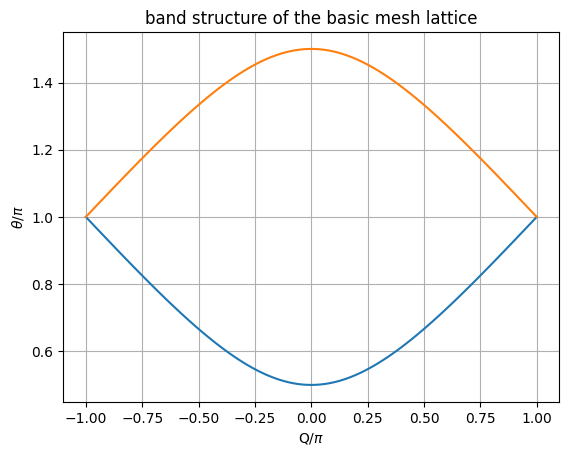

In [1]:
# draw the band structure
import numpy as np
import matplotlib.pyplot as plt
q = np.linspace(-1*np.pi,np.pi,num=101)
th1 = np.arccos((np.cos(q)-1)/2)
th2 = -1*th1 + 2*np.pi
plt.plot(q/np.pi, th1/np.pi)
plt.plot(q/np.pi, th2/np.pi)
plt.xlabel(r"Q/$\pi$")
plt.ylabel(r"$\theta$/$\pi$")
plt.title("band structure of the basic mesh lattice")
plt.grid(True)
plt.show()

### On-site potential (in-loop phase modulation)
Now we add a phase modulation to each pulse in the long loop by following the scheme in Regensburger et al., Nature 488, 167–171 (2012)

$$\varphi(n) = \left\{ \begin{aligned} 
  -\varphi_0 \; &\mathrm{for}\; \mathrm{mod}(n+3;4)=0;1  \\
  +\varphi_0 \; &\mathrm{for}\; \mathrm{mod}(n+3;4)=2;3.
\end{aligned} \right.$$

When exciting the lattice with a single pulse at the position of $n=0$, the pulses in every roundtrip will only occupy either even or odd positions of $n$. By applying this phase modulation, we can get alternative phase modulation for the pulses within one roundtrip. 

<img src="mesh_phase_with_markers.svg" width="50%"/>

Now the evolution can be written as
$$\begin{aligned}
a_{n+1}^{m+1} &= \frac{1}{\sqrt 2}(a_n^m + ib_n^m)e^{i\varphi(n+1)} \\
b_{n+1}^{m+1} &= \frac{1}{\sqrt 2}(ia_{n+2}^m + b_{n+2}^m) \\
\end{aligned}$$
The plane wave ansatz now becomes
$$\begin{pmatrix}a_{n}^{m+2} \\ \\ b_{n}^{m+2}\end{pmatrix} = \begin{pmatrix}a_{n}^{m} \\ \\ b_{n}^{m}\end{pmatrix} e^{i\theta} $$

$$\begin{pmatrix}a_{n+4}^{m} \\ \\ b_{n+4}^{m}\end{pmatrix} = \begin{pmatrix}a_{n}^{m} \\ \\ b_{n}^{m}\end{pmatrix} e^{iQ} $$
From above we can again solve for the dispersion relation (band structure)

$$ \cos(Q) = 8\cos^2(\theta)+8\cos(\varphi_0)\cos(\theta)+4\cos^2(\varphi_0)-3$$

To get this equation, one can first get 4 equations for $a_0^0$, $b_0^0$, $a_2^0$, $b_2^0$ and write in matrix form $AX=0$, where $X$ is the 4 dimensional vector containing $a_0^0$, $b_0^0$, $a_2^0$, $b_2^0$ and $A$ is the 4x4 matrix containing $\theta$, $Q$, and $\varphi_0$. Then one can solve for the relation between $\theta$ and $Q$ by setting the determinant of $A$ to be 0. The calculation can be done by using the symbolic toolbox in MATLAB or by similar software. 

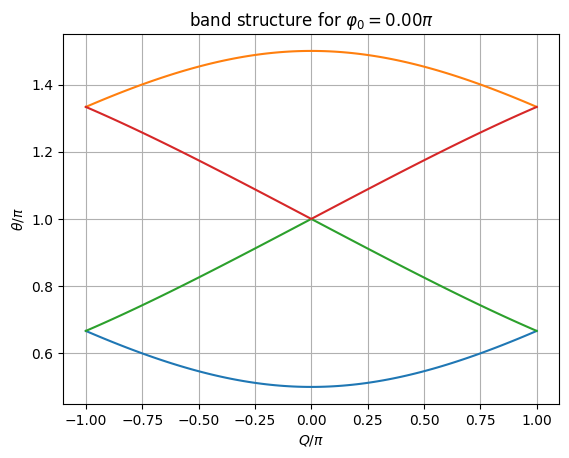

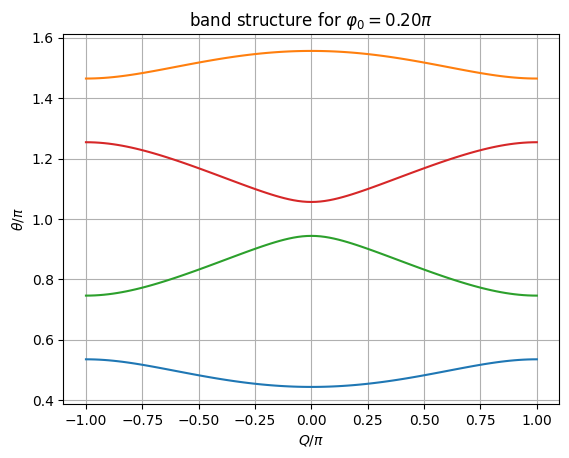

In [12]:
import numpy as np
import matplotlib.pyplot as plt

phi_values = [0, np.pi/5] # try 0, np.pi/5 and compare with Supplementary Figure 6 in Nature(2012)

for phi in phi_values:

    Q_array = np.linspace(-1*np.pi, np.pi, 101)

    theta11_array = []
    theta12_array = []
    theta21_array = []
    theta22_array = []

    for Q in Q_array:
        a = 8
        b = 8*np.cos(phi)
        c = 4*(np.cos(phi))**2-3-np.cos(Q)
        discriminant = b**2 - 4 * a * c
        z1 = (-b + np.sqrt(discriminant)) / (2 * a)
        z2 = (-b - np.sqrt(discriminant)) / (2 * a)
        
        theta11_array.append(np.arccos(z1))
        theta12_array.append(-1*np.arccos(z1))
        theta21_array.append(np.arccos(z2))
        theta22_array.append(-1*np.arccos(z2))

    # Convert lists to numpy arrays
    theta11_array = np.array(theta11_array)
    theta12_array = np.array(theta12_array)
    theta21_array = np.array(theta21_array)
    theta22_array = np.array(theta22_array)

    # Unwrap the theta values to make them continuous
    theta11_array_unwrapped = np.unwrap(theta11_array)
    theta12_array_unwrapped = np.unwrap(theta12_array) + 2*np.pi
    theta21_array_unwrapped = np.unwrap(theta21_array)
    theta22_array_unwrapped = np.unwrap(theta22_array) + 2*np.pi

    # Plot theta vs Q
    plt.figure()
    plt.plot(Q_array/np.pi, theta11_array_unwrapped/np.pi)
    plt.plot(Q_array/np.pi, theta12_array_unwrapped/np.pi)
    plt.plot(Q_array/np.pi, theta21_array_unwrapped/np.pi)
    plt.plot(Q_array/np.pi, theta22_array_unwrapped/np.pi)
    plt.title(r'band structure for $\varphi_0 = {:.2f}\pi$'.format(phi/np.pi))
    plt.xlabel(r'$Q/\pi$')
    plt.ylabel(r'$\theta/\pi$')
    plt.grid(True)

plt.show()


### Floquet SSH
<img src="mesh_SSH_with_markers.svg" width="50%"/>

$$\begin{aligned}
a_{n+1}^{m+1} &= \cos(\beta^m)a_n^m + i\sin(\beta^m)b_n^m \\
b_{n+1}^{m+1} &= i\sin(\beta^m)a_{n+2}^m + \cos(\beta^m)b_{n+2}^m \\
\end{aligned}$$
where
$$\beta^m = \left\{ \begin{aligned} 
  \beta_o,\; & m=1,3,5,...  \\
  \beta_e,\; & m=2,4,6,...
\end{aligned} \right.$$

The translational symmetry gives
$$\begin{pmatrix}a_{n}^{m+2} \\ \\ b_{n}^{m+2}\end{pmatrix} = 
\begin{pmatrix}a_{n}^{m} \\ \\ b_{n}^{m}\end{pmatrix} e^{i\theta}$$

$$\begin{pmatrix}a_{n+2}^{m} \\ \\ b_{n+2}^{m}\end{pmatrix} = 
\begin{pmatrix}a_{n}^{m} \\ \\ b_{n}^{m}\end{pmatrix} e^{iQ}$$

Use the equations above we can get:


### Nonlinear potential

$$\begin{aligned}
a_{n+1}^{m+1} &= \frac{1}{\sqrt 2}(a_n^m + ib_n^m)e^{i\kappa\left|a_n^m + ib_n^m \right|^2/2} \\
b_{n+1}^{m+1} &= \frac{1}{\sqrt 2}(ia_{n+2}^m + b_{n+2}^m)e^{i\kappa\left|ia_{n+2}^m + b_{n+2}^m \right|^2/2} \\
\end{aligned}$$


### Time evolution 

To calculate the evolution of the synthetic lattice under certain excitation, we use two arrays to store the complex amplitude of the pulses during each roundtrip in the long and short loops, respectively. The arrays for all roundtrips are stacked together to form the whole evolution trajectory. To begin, we first define some variables used in the calculation. 

$N$: length of the lattice and pulse array 

$M$: number of roundtrips, the excitation is defined as roundtrip 0 and will be propagated for M steps 

To avoid the boundary effect, $N$ should be larger than $2M+x$ for an excitation near the center of the lattice. One can use absorbing boundary conditions or reflective boundary conditions (which is used in the schematic above) to model the boundary. Periodic boundary condition can not be implemented in the experiment.

How to introduce an interface? Here, the interface between two different lattice is introduced at one lattice position $n$. Imagine we connect two mesh lattice shown in the figure side by side with couplers. These couplers are at the position $n$.

**TO-DO: Where is the topology?**

In [1]:
import numpy as np
import sys

def prop_one_step(Lattice,N,in_field_long,in_field_short,m,bc="abs"):
    # m is an indicator which goes through the function without being modified
    # so that it may be used for tracking the step in Floquet modulation
    out_field_long = np.zeros(N, dtype=np.complex128)
    out_field_short = np.zeros(N, dtype=np.complex128)

    array_lattice_length = []
    for lattice in Lattice:
        # creating an array for the length of each pieces of lattice
        array_lattice_length.append(lattice[1])

    n_start = 1 # note that python counts from 0 rather than 1
    for ind_lat, len_lat in enumerate(array_lattice_length):
        n_end = n_start + len_lat - 1
        for ii in range(n_start,n_end+1): # note that python counts from 0 rather than 1
            if m%2 == 1 and ii%2 == 0: # no boundary, only bulk or interface
                if Lattice[ind_lat][0] == "interface":
                    out_field_long[ii-1] = prop_bulk_long(
                        Lattice[ind_lat-1],in_field_long[ii-2],in_field_short[ii-2],m)
                    out_field_short[ii-1] = prop_bulk_short(
                        Lattice[ind_lat+1],in_field_long[ii],in_field_short[ii],m)
                else:
                    out_field_long[ii-1] = prop_bulk_long(
                        Lattice[ind_lat],in_field_long[ii-2],in_field_short[ii-2],m)
                    out_field_short[ii-1] = prop_bulk_short(
                        Lattice[ind_lat],in_field_long[ii],in_field_short[ii],m)

            elif m%2 == 0 and ii%2 == 1: # there is boundary and another two kinds of interface
                if ii == 1: # left boundary
                    out_field_long[ii-1] = 0 # absorbing boundary
                    out_field_short[ii-1] = prop_bulk_short(
                        Lattice[ind_lat],in_field_long[ii],in_field_short[ii],m)
                elif ii == N: # right boundary
                    out_field_long[ii-1] = prop_bulk_long(
                        Lattice[ind_lat],in_field_long[ii-2],in_field_short[ii-2],m)
                    out_field_short[ii-1] = 0 # absorbing boundary
                elif ii == n_end: # left side of interface
                    out_field_long[ii-1] = prop_bulk_long(
                        Lattice[ind_lat],in_field_long[ii-2],in_field_short[ii-2],m)
                    out_field_short[ii-1] = prop_bulk_short(
                        ["simple"],in_field_long[ii],in_field_short[ii],m)
                elif ii == n_start: # right side of interface
                    out_field_long[ii-1] = prop_bulk_long(
                        ["simple"],in_field_long[ii-2],in_field_short[ii-2],m)
                    out_field_short[ii-1] = prop_bulk_short(
                        Lattice[ind_lat],in_field_long[ii],in_field_short[ii],m)
                else:
                    out_field_long[ii-1] = prop_bulk_long(
                        Lattice[ind_lat],in_field_long[ii-2],in_field_short[ii-2],m)
                    out_field_short[ii-1] = prop_bulk_short(
                        Lattice[ind_lat],in_field_long[ii],in_field_short[ii],m)
        n_start = n_end + 1
   
    return out_field_long, out_field_short, m

def prop_bulk_long(lattice,long,short,m):
    if lattice[0] == "simple":
        out_pulse_long = coupler_simple_long(long,short)
    elif lattice[0] == "nonlinear potential":
        kappa = lattice[2]
        out_pulse_long = coupler_nonlinear_potential_long(long,short,kappa)
    elif lattice[0] == "SSH":
        out_pulse_long = coupler_SSH_long(long,short,m,lattice[2],lattice[3])
    else:
        sys.exit("Undefined lattice type.")
    return out_pulse_long

def prop_bulk_short(lattice,long,short,m):
    if lattice[0] == "simple":
        out_pulse_short = coupler_simple_short(long,short)
    elif lattice[0] == "nonlinear potential":
        kappa = lattice[2]
        out_pulse_short = coupler_nonlinear_potential_short(long,short,kappa)
    elif lattice[0] == "SSH":
        out_pulse_short = coupler_SSH_short(long,short,m,lattice[2],lattice[3])
    else:
        sys.exit("Undefined lattice type.")
    return out_pulse_short


def coupler_simple_long(in_pulse_long,in_pulse_short):
    out_pulse_long = (in_pulse_long + 1j*in_pulse_short)/np.sqrt(2)
    return out_pulse_long

def coupler_simple_short(in_pulse_long,in_pulse_short):
    out_pulse_short = (1j*in_pulse_long + in_pulse_short)/np.sqrt(2)
    return out_pulse_short

def coupler_nonlinear_potential_long(in_pulse_long, in_pulse_short,kappa):
    amp_linear = (in_pulse_long + 1j*in_pulse_short)/np.sqrt(2)
    out_pulse_long = amp_linear*np.exp(1j*kappa*(abs(amp_linear)**2))
    return out_pulse_long

def coupler_nonlinear_potential_short(in_pulse_long, in_pulse_short,kappa):
    amp_linear = (1j*in_pulse_long + in_pulse_short)/np.sqrt(2)
    out_pulse_short = amp_linear*np.exp(1j*kappa*(abs(amp_linear)**2))
    return out_pulse_short

def coupler_SSH_long(in_pulse_long,in_pulse_short,m,beta_o,beta_e):
    if m%2 == 1: # m is odd (1,3,5,...)
        out_pulse_long = (np.cos(beta_o)*in_pulse_long 
                          + 1j*np.sin(beta_o)*in_pulse_short)
    else: # m is even (2,4,6,...)
        out_pulse_long = (np.cos(beta_e)*in_pulse_long 
                          + 1j*np.sin(beta_e)*in_pulse_short)
    return out_pulse_long

def coupler_SSH_short(in_pulse_long,in_pulse_short,m,beta_o,beta_e):
    if m%2 == 1: # m is odd (1,3,5,...)
        out_pulse_short = (np.cos(beta_o)*in_pulse_short
                          + 1j*np.sin(beta_o)*in_pulse_long)
    else: # m is even (2,4,6,...)
        out_pulse_short = (np.cos(beta_e)*in_pulse_short
                          + 1j*np.sin(beta_e)*in_pulse_long)
    return out_pulse_short


def initialize_excitation(Excitations,N):
    field_long = np.zeros(N, dtype=np.complex128)
    field_short = np.zeros(N, dtype=np.complex128)
    for excitation in Excitations:
        if excitation[0] == "single long":
            ind = excitation[1] - 1 # python counts from 0 by default
            field_long[ind] = field_long[ind] + np.sqrt(excitation[2])
        elif excitation[0] == "single short":
            ind = excitation[1] - 1
            field_short[ind] = field_short[ind] + np.sqrt(excitation[2])
        else:
            sys.exit("Undefined excitation type.")

    return field_long, field_short

def get_lattice_length(Lattice):
    N = 0
    for lattice in Lattice:
        N = N + lattice[1]
    if isinstance(N,int) == False:
        sys.exit("Lattice length should be an integer.")
    return N

#########################################################
# define the lattice structure
# lattice length should be odd number, count from 1 rather than 0 
Lattice = [
    ["simple",111], # type, n
    # ["nonlinear potential",111,6], # type, n, kappa=1.5 for 1km, 1W, SMF
    # ["SSH",55,0.25*np.pi,0.13*np.pi], # type, n, beta_o, beta_e 
    # ["interface",1],
    # ["SSH",55,0.25*np.pi,0.35*np.pi]
    # ["simple",55],
    # ["interface",1],
    # ["simple",55]
]

# define the excitation
Excitations = [  # excitation position must be odd numbers
    ["single long",55,1],  # type, n, power=1 for 1W
    # ["single short",55,1],
] # ["Gaussian long",54,10]

# set number of roundtrips
M = 50

#########################################################

N = get_lattice_length(Lattice) # number of sites (n)
print(f"Lattice length = {N}")

in_field_long, in_field_short = initialize_excitation(Excitations,N)


evolution_long = np.zeros((1+M,N),dtype=np.complex128)
evolution_long[0] = in_field_long
evolution_short = np.zeros((1+M,N),dtype=np.complex128)
evolution_short[0] = in_field_short
m = 1
while m<=M:
    out_field_long, out_field_short, m = prop_one_step(Lattice,N,
                                                       in_field_long,
                                                       in_field_short,
                                                       m)
    evolution_long[m] = out_field_long
    evolution_short[m] = out_field_short
    in_field_long = out_field_long
    in_field_short = out_field_short
    m = m+1


Lattice length = 111


In [2]:
# check energy conservation 
check_step = M
E_start = (np.sum(np.square(np.absolute(evolution_long[0])))
           + np.sum(np.square(np.absolute(evolution_short[0]))))

E_end = (np.sum(np.square(np.absolute(evolution_long[check_step])))
         + np.sum(np.square(np.absolute(evolution_short[check_step]))))

print(f"Initial energy: {E_start}\nEnergy after {check_step} steps: {E_end}")

Initial energy: 1.0
Energy after 50 steps: 0.9999999999999907


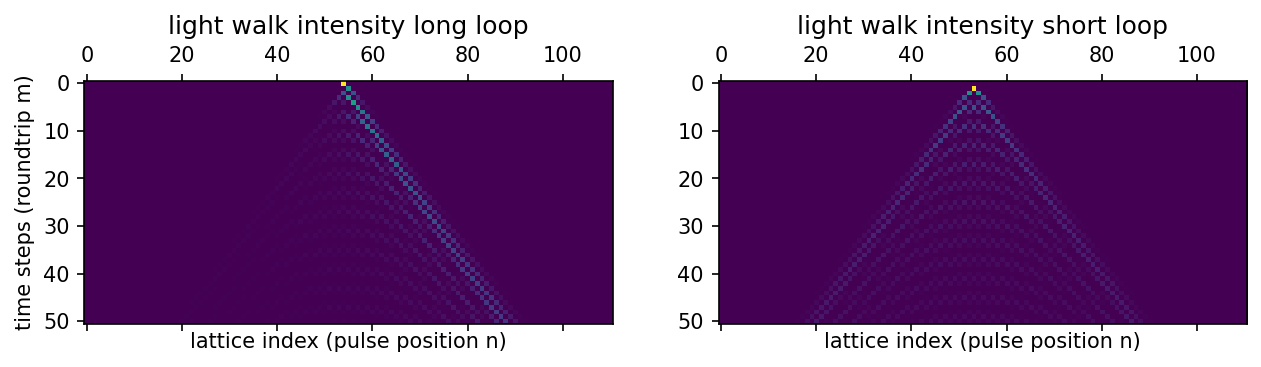

In [3]:
# plot
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline 

fig, ax = plt.subplots(1,2,figsize=(10,6),dpi=150)
ax[0].matshow(np.square(np.absolute(evolution_long)))
ax[0].set_title("light walk intensity long loop")
ax[0].set_xlabel("lattice index (pulse position n)")
ax[0].set_ylabel("time steps (roundtrip m)")
ax[1].matshow(np.square(np.absolute(evolution_short)))
ax[1].set_title("light walk intensity short loop")
ax[1].set_xlabel("lattice index (pulse position n)")

plt.show()

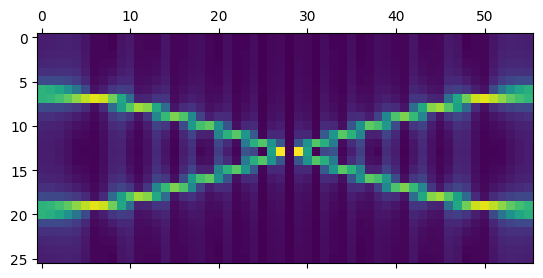

In [7]:
# FFT to show band structure when using point excitation
# Perform 2D FFT
matrix = evolution_short[0::2,0::2]
fft_result = np.fft.fft2(matrix)

# Shift zero-frequency component to the center
# fft_shifted = np.fft.fftshift(fft_result)

# Magnitude Spectrum (absolute value)
magnitude_spectrum = np.abs(fft_result)

fig, ax = plt.subplots()
ax.matshow(magnitude_spectrum)
plt.show()

In [ ]:
# save figure to current folder
import os
cwd = os.getcwd()
# plt.savefig(os.path.join(cwd, 'light_walk_basic.png'))